https://confluence.knmi.nl/pages/viewpage.action?pageId=97126114 (Documentation how to get netcdf file visualized in Geoweb - does not work)

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import matplotlib.cm as cm
import pandas as pd
import random

In [5]:
filename = '~/work/private/ECMWF_2022_02_28.nc'

In [6]:
data = xr.open_dataset(filename)
tstart = pd.to_datetime('2024/01/25 15', format='%Y/%m/%d %H')
tend = pd.to_datetime('2024/01/26 00', format='%Y/%m/%d %H')
time = pd.date_range(tstart, tend, freq='H')

/tmp/ipykernel_284/3909370747.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time = pd.date_range(tstart, tend, freq='H')


In [7]:
lon = np.linspace(-2,8,51)
lat = np.linspace(50, 60, 51)
randomdata = np.random.normal(4,2, size=(lon.shape[0], lat.shape[0],time.shape[0]))
for i in range(len(randomdata[0,:,0])):
    randomdata[:,i,:] = randomdata[:,i,:]+0.5*i

for i in range(len(randomdata[:,0,0])):
    randomdata[i,:,:] = randomdata[i,:,:]+0.6*(len(randomdata[:,0,0])-i)

randomdata=-randomdata+40

randomdata = np.transpose(randomdata, (2,0,1))
data = xr.Dataset(

    data_vars=dict(

        wind=(['time','longitude','latitude',], randomdata),

    ),

    coords=dict(
        time=time,

        longitude=lon,

        latitude=lat,



    ),
)

In [8]:
V = np.linspace(-20, 40, 30)

Dit is een figuur waarin ik windsnelheid laat zien - ECMWF-data

/opt/conda/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


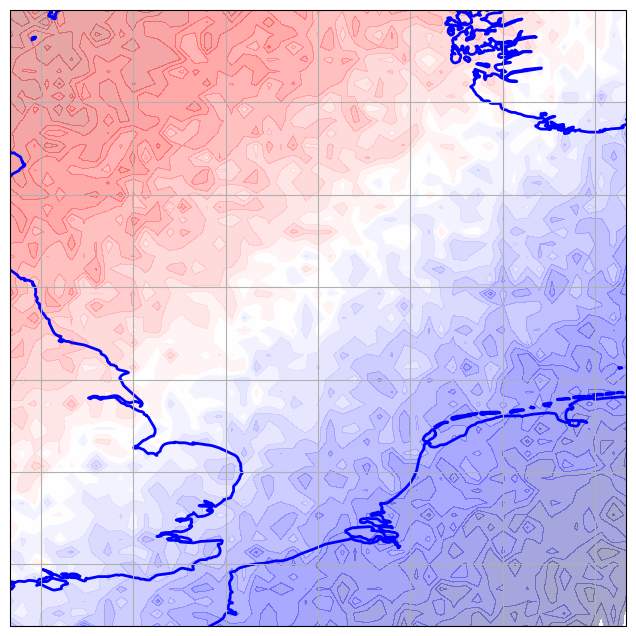

In [9]:
fig = plt.figure(figsize=[12,8])
proj = ccrs.PlateCarree()

ax = plt.axes(projection=proj)

CS = ax.contourf(data.longitude, data.latitude, data.wind[2,:,:], V, cmap = cm.seismic, alpha = 0.35, transform = ccrs.PlateCarree())  #divide by 10 is conversion to decameters

ax.coastlines(resolution='10m', color='blue', linewidth=2)
ax.gridlines()
plt.show()
#V = np.linspace(300,650,30)


In [10]:
data.to_netcdf('~/work/private/testfile3.nc')

In [11]:
data

<xarray.Dataset> Size: 209kB
Dimensions:    (time: 10, longitude: 51, latitude: 51)
Coordinates:
  * time       (time) datetime64[ns] 80B 2024-01-25T15:00:00 ... 2024-01-26
  * longitude  (longitude) float64 408B -2.0 -1.8 -1.6 -1.4 ... 7.4 7.6 7.8 8.0
  * latitude   (latitude) float64 408B 50.0 50.2 50.4 50.6 ... 59.6 59.8 60.0
Data variables:
    wind       (time, longitude, latitude) float64 208kB 1.403 3.158 ... 7.836

In [12]:
import numpy as np

In [13]:
u=50*np.log((10/0.002))/np.log(33/0.002)

In [14]:
u

43.852804815187824